In [1]:
import cv2
import re
from matplotlib import pyplot as plt
import numpy as np
import pytesseract
import pymongo
from PIL import Image
im_file = "C:/Users/neeta/temp/raducky aadhaar.jpg"
img = cv2.imread(im_file)

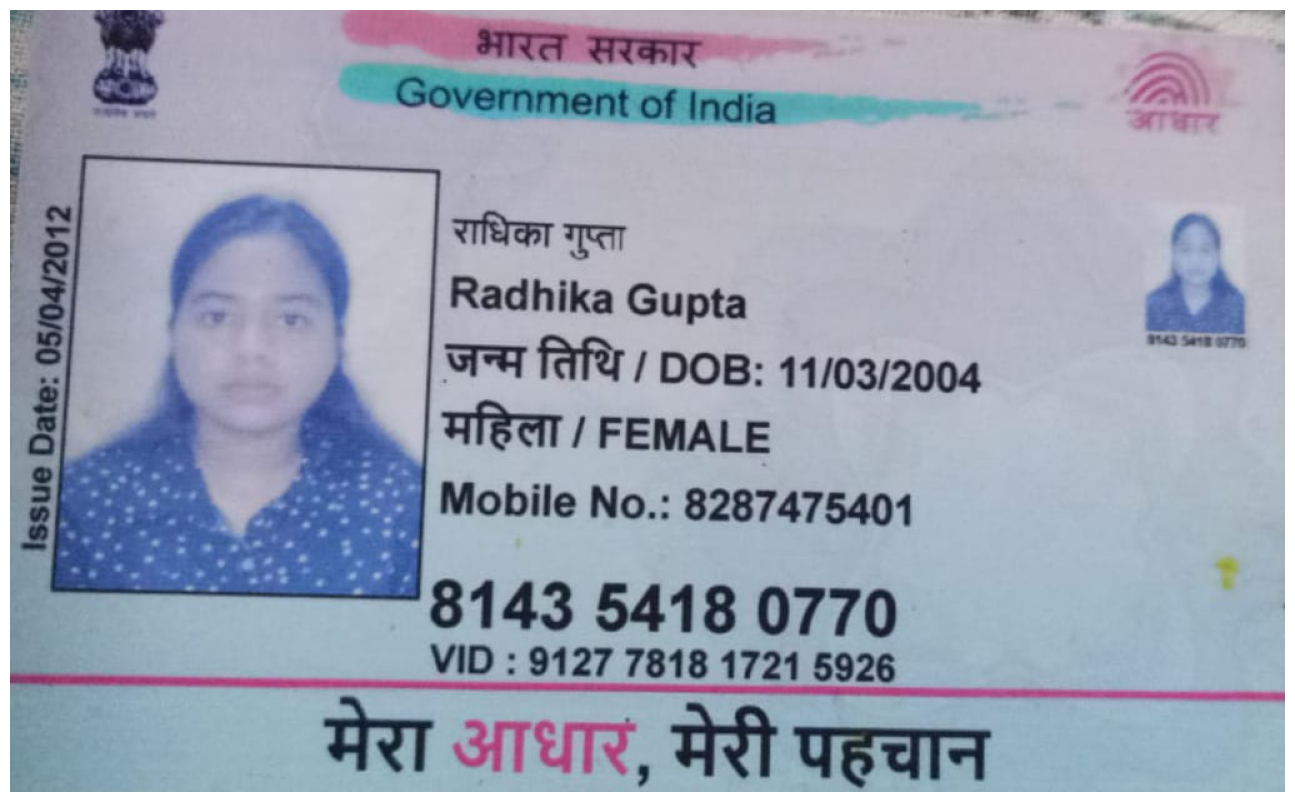

In [2]:
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)
    height, width = im_data.shape[:2]
    figsize = width / float(dpi), height / float(dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    ax.imshow(im_data, cmap='gray')
    plt.show()
display(im_file)

In [3]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [4]:
gray_image = grayscale(img)
cv2.imwrite("C:/Users/neeta/temp/graya1.jpg", gray_image)

True

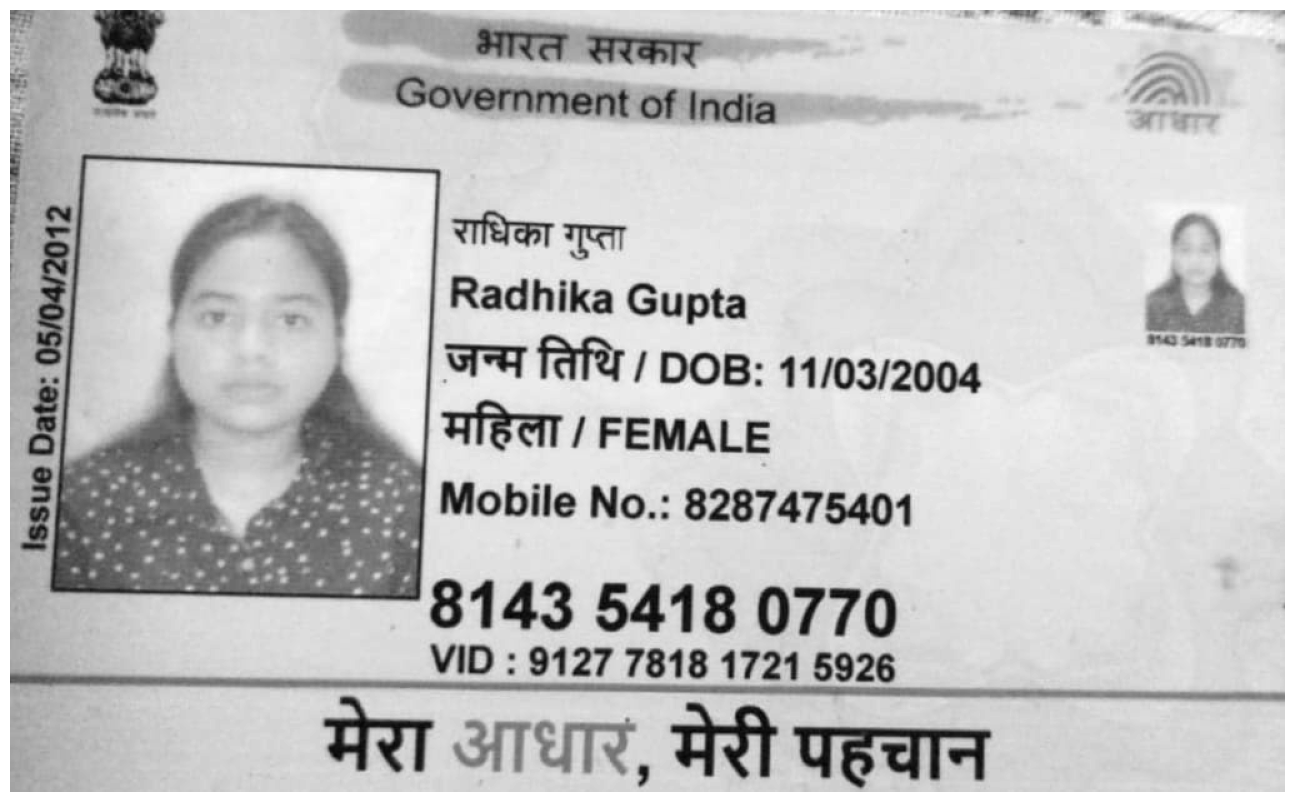

In [5]:
display("C:/Users/neeta/temp/graya1.jpg")

In [1]:
def getSkewAngle(cvImage) -> float:
    newImage = cvImage.copy()
    blur = cv2.GaussianBlur(newImage, (9, 9), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilate = cv2.dilate(thresh, kernel, iterations=5)

    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)


    largestContour = contours[0]
    minAreaRect = cv2.minAreaRect(largestContour)

    angle = minAreaRect[-1]
    if angle < -45:
        angle = 90 + angle
    return -4.023 * angle

In [2]:
def rotateImage(cvImage, angle: float):
    newImage = cvImage.copy()
    (h, w) = newImage.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    newImage = cv2.warpAffine(newImage, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return newImage

def deskew(cvImage):
    angle = getSkewAngle(cvImage)
    return rotateImage(cvImage, -1.0 * angle)

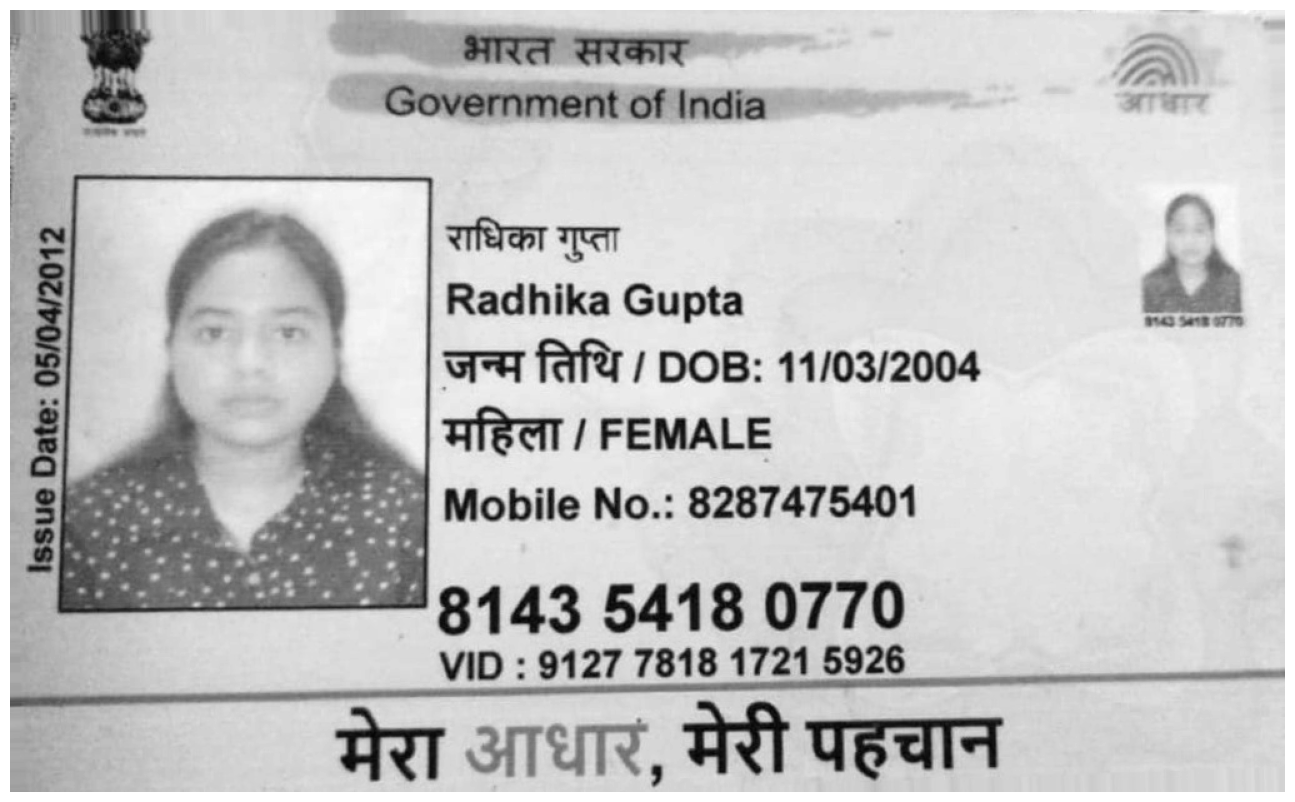

In [8]:
fixim = deskew(gray_image)
cv2.imwrite("C:/Users/neeta/temp/rotfix.jpg", fixim)
display("C:/Users/neeta/temp/rotfix.jpg")

In [9]:
print(img.shape)

(626, 1020, 3)


In [10]:
cropped_image = fixim[210:505, 340:785]
cv2.imwrite("C:/Users/neeta/temp/CropAd.jpg", cropped_image)

True

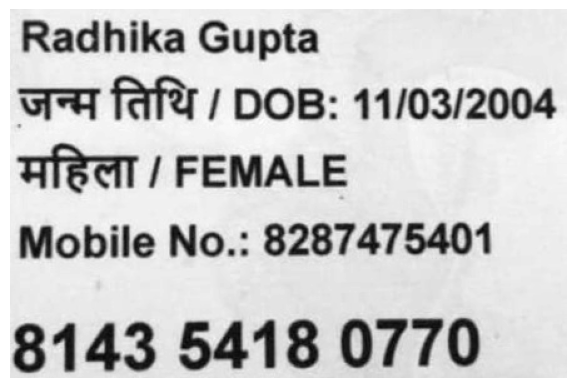

In [11]:
display("C:/Users/neeta/temp/CropAd.jpg")

In [12]:
thresh, im_bww = cv2.threshold(cropped_image, 140, 190, cv2.THRESH_BINARY)
cv2.imwrite("C:/Users/neeta/temp/bww.jpg", im_bww)

True

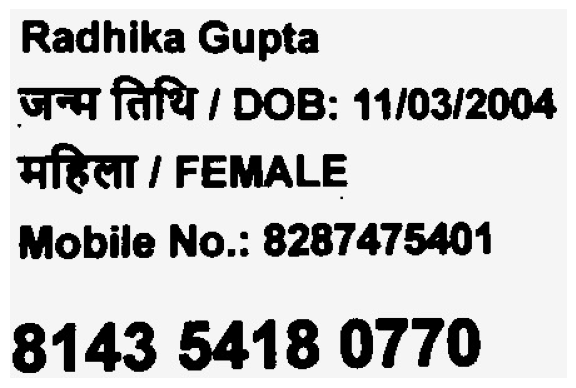

In [13]:
display("C:/Users/neeta/temp/bww.jpg")

In [14]:
im_file = "C:/Users/neeta/temp/bww.jpg"

In [15]:
img = Image.open(im_file)
ocr_resultf = pytesseract.image_to_string(img)

In [16]:
print(ocr_resultf)

Radhika Gupta
wa fafer / DOB: 11/03/2004

after) FEMALE

Mobile No.: 8287475401
8143 5418 0770



In [78]:
pattern = re.compile('\d.*\d')
matches = pattern.finditer(ocr_resultf)

In [79]:
pattern2 = re.compile('\D.*\D')
matchesnam = pattern2.finditer(ocr_resultf)

In [80]:
pattern3 = re.compile('(MALE|..MALE)\s')
matchesgen = pattern3.finditer(ocr_resultf)

In [81]:
for match in matches:
    print(match)

<re.Match object; span=(30, 40), match='11/03/2004'>
<re.Match object; span=(69, 79), match='8287475401'>
<re.Match object; span=(80, 94), match='8143 5418 0770'>


In [82]:
for matche in matchesnam:
    print(matche)

<re.Match object; span=(0, 14), match='Radhika Gupta\n'>
<re.Match object; span=(14, 41), match='wa fafer / DOB: 11/03/2004\n'>
<re.Match object; span=(41, 56), match='\nafter) FEMALE\n'>
<re.Match object; span=(56, 80), match='\nMobile No.: 8287475401\n'>
<re.Match object; span=(84, 95), match=' 5418 0770\n'>


In [83]:
for matchee in matchesgen:
    print(matchee)

<re.Match object; span=(49, 56), match='FEMALE\n'>


In [95]:
f1 = ocr_resultf[0:13]
f2 = ocr_resultf[30:40]
f3 = ocr_resultf[49:55]
f4 = ocr_resultf[69:79]
f5 = ocr_resultf[80:94]

In [96]:
print(f1)
print(f2)
print(f3)
print(f4)
print(f5)

Radhika Gupta
11/03/2004
FEMALE
8287475401
8143 5418 0770


In [97]:
if __name__ == "__main__":
    client = pymongo.MongoClient("mongodb://localhost:27017")
    print(client)
    print(client.list_database_names())

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)
['OCR', 'admin', 'config', 'local', 'sample']


In [98]:
    db = client['OCR']  
    collection = db['Aadhaar']

In [101]:
    dic1 = {'Name': f1,'D.O.B.' : f2, "Sex" : f3,'Mobile' : f4, 'Aadhaar Number' : f5}
    print(dic1)

{'Name': 'Radhika Gupta', 'D.O.B.': '11/03/2004', 'Sex': 'FEMALE', 'Mobile': '8287475401', 'Aadhaar Number': '8143 5418 0770'}
